
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
## library imports here

In [2]:
import pandas as pd

ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


[Text(0.4375, 0.9, 'output <= 0.5\ngini = 0.653\nsamples = 218\nvalue = [106, 36, 61, 15]'),
 Text(0.25, 0.7, 'chol <= 288.5\ngini = 0.416\nsamples = 103\nvalue = [77, 6, 14, 6]'),
 Text(0.34375, 0.8, 'True  '),
 Text(0.2, 0.5, 'thalach <= 144.5\ngini = 0.489\nsamples = 83\nvalue = [57.0, 6.0, 14.0, 6.0]'),
 Text(0.1, 0.3, 'chol <= 157.5\ngini = 0.347\nsamples = 49\nvalue = [39.0, 3.0, 6.0, 1.0]'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.15, 0.1, 'gini = 0.325\nsamples = 48\nvalue = [39, 3, 5, 1]'),
 Text(0.3, 0.3, 'thalach <= 153.0\ngini = 0.635\nsamples = 34\nvalue = [18, 3, 8, 5]'),
 Text(0.25, 0.1, 'gini = 0.494\nsamples = 9\nvalue = [2, 0, 6, 1]'),
 Text(0.35, 0.1, 'gini = 0.544\nsamples = 25\nvalue = [16, 3, 2, 4]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.625, 0.7, 'thalach <= 149.0\ngini = 0.695\nsamples = 115\nvalue = [29, 30, 47, 9]'),
 Text(0.53125, 0.8, '  False'),
 Text(0.45, 0.5, 'trtbps <= 109.0\ngini

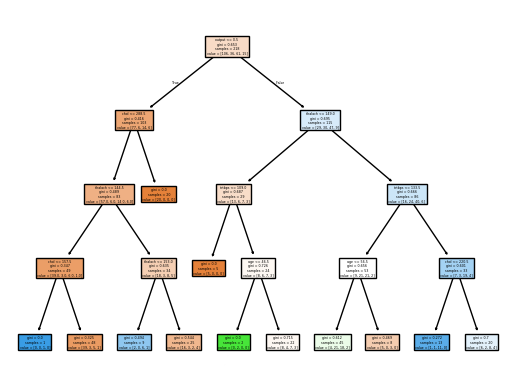

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

X = ha.drop(columns='cp')
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

plot_tree(tree, feature_names=X.columns, filled=True)


The decision tree’s first split separates patients based on output, meaning diagnosed heart disease status is the strongest predictor of chest pain type. Among patients without heart disease, the next split is on cholesterol, indicating that cholesterol levels distinguish chest pain patterns within this subgroup. For patients with heart disease, the second split is instead based on maximum heart rate (thalach), showing that variation in exercise heart rate helps differentiate chest pain categories on the disease side of the tree. 

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

ha['cp_is_0'] = (ha['cp'] == 0).astype(int)
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)

X = ha.drop(columns=['cp','cp_is_0','cp_is_1','cp_is_2','cp_is_3'])

X_train, X_test, y_train, y_test = train_test_split(X, ha['cp_is_0'], test_size=0.2, random_state=1)
mod_0 = LogisticRegression(max_iter=200).fit(X_train, y_train)
f1_0 = f1_score(y_test, mod_0.predict(X_test))

X_train, X_test, y_train, y_test = train_test_split(X, ha['cp_is_1'], test_size=0.2, random_state=1)
mod_1 = LogisticRegression(max_iter=200).fit(X_train, y_train)
f1_1 = f1_score(y_test, mod_1.predict(X_test))

X_train, X_test, y_train, y_test = train_test_split(X, ha['cp_is_2'], test_size=0.2, random_state=1)
mod_2 = LogisticRegression(max_iter=200).fit(X_train, y_train)
f1_2 = f1_score(y_test, mod_2.predict(X_test))

X_train, X_test, y_train, y_test = train_test_split(X, ha['cp_is_3'], test_size=0.2, random_state=1)
mod_3 = LogisticRegression(max_iter=200).fit(X_train, y_train)
f1_3 = f1_score(y_test, mod_3.predict(X_test))

f1_0, f1_1, f1_2, f1_3


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
   

(0.7083333333333334, 0.0, 0.09090909090909091, 0.0)

The ovr was best at distinguishing chest-pain category 0 from the rest.

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

sub_01 = ha[(ha['cp']==0) | (ha['cp']==1)]
X01 = sub_01.drop(columns='cp')
y01 = (sub_01['cp']==0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X01, y01, test_size=0.2, random_state=1)
mod_01 = LogisticRegression(max_iter=200).fit(X_train, y_train)
auc_01 = roc_auc_score(y_test, mod_01.predict_proba(X_test)[:,1])

sub_02 = ha[(ha['cp']==0) | (ha['cp']==2)]
X02 = sub_02.drop(columns='cp')
y02 = (sub_02['cp']==0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X02, y02, test_size=0.2, random_state=1)
mod_02 = LogisticRegression(max_iter=200).fit(X_train, y_train)
auc_02 = roc_auc_score(y_test, mod_02.predict_proba(X_test)[:,1])

sub_03 = ha[(ha['cp']==0) | (ha['cp']==3)]
X03 = sub_03.drop(columns='cp')
y03 = (sub_03['cp']==0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X03, y03, test_size=0.2, random_state=1)
mod_03 = LogisticRegression(max_iter=200).fit(X_train, y_train)
auc_03 = roc_auc_score(y_test, mod_03.predict_proba(X_test)[:,1])

auc_01, auc_02, auc_03


(0.8333333333333334, 0.8260869565217391, 0.8024691358024691)

The ovo approach was best at distinguishing chest-pain category 0 versus category 1, since that pair had the highest ROC-AUC